In [7]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk


# dss_team_project

## [House Price: Adcanced Regressin Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
+ team lucky
  + 권순호, 지성민, 김동현

+ Goal
	* it is your job to predict the sales price for each house.
	* For each Id in test set, you must predict the value of the SalePrice variable.

+ Metric
	* submissions are evaluated in Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.(Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally)

+ porject index
	* ~ 10/10 EDA(Exploratory data analysis)
	* ~ 10/14 Feature selection
	* ~ 10/16 Modeling(OLS Regression)
	* ~ 10/21 Model selection
	* ~ 10/25 Project 발표


### EDA 
+ 변수 탐색 및 분류
  + 변수가 무엇을 의미하는지 파악
  + 상관관계가 없는 변수는 어떤것이 있나?
  + 판매가격과 상관관게가 없는 변수는 어떻게 처리할 것인가?
  + 의미없는값, 전처리가 필요한 값들을 선별및 가공하자


+ EDA 담당 Column
  + 김동현 : 01. MSSubClass ~ 28. Foundation (28개)   
  + 지성민 : 29. BsmtQual ~ 54. Functional (26개)  
  + 권순호 : 55. Fireplaces ~ 78. SalesCondition (24개)  
  

In [10]:
df = pd.read_csv('./data/train.csv')
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.keys()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### 건축물
1.	MSSubClass : 거주유형
2.	 MSZoning : 일반 구역분류
3.	 LotFrontage : 자산에서 도로까지의 거리(단위:feet)
4.	 LotArea : 크기(단위:평방피트)
5.	 Street : 근접한 도로의 유형 ( Gravel-비포장(자갈) / Paved-포장 ) 
6.	  Alley : 근접한 골목의 유형
7.	 LotShape : 자산의 일반적인 형태
8.	 LandContour : 건물의 평평한 정도
9.	 Utilities : 가능한 편의시설의 종류
10.	Lot configuration : 부지 구성
11.	LandSlope : 건물의 기울기
12.	Neighborhood : 에임즈 시내 한정 물리적 위치
13.	Condition1 : 여러 조건에의 근접성
14.	Condition2 : 13이 달성된 상태에서의 여러 조건의 근접성
15.	BldgType : 건물 형태(1가족, 2가족, 양면가옥, 타운하우스)
16.	HouseStyle : 주거 스타일 (1층, 1층 반, 2층, 등등)
17.	OverallCond : 가옥의 전체적인 조건 (매우 훌륭, 훌륭, 매우 좋음, 좋음, 등등)

#### 준공 년도
18.	YearBuilt : 초기 준공연도
19.	YearRemodAdd : 리모델링연도(초기준공연도와 같다면 no remodeling or additions)

#### 형태, 재료
20.	RoofStyle : 지붕 형태 (평면, 박공(삼각), 등등)
21.	RoofMatl : 지붕 재료 (점토, 표준, 금속, 등등)
22.	Exterior1st : 건물 외벽 (아스팔트, 벽돌 등등)
23.	Exterior2nd : 건물 외벽 (건물외벽1의 재료 보다 많은 경우)
24.	MasVnrType : 석조 베니어 유형 (보통 벽돌, 벽돌 노출, 콘크리트 블럭, 없음, 돌)
25.	MasVnrArea : 석조 베니어 면적 (평방 피트)
26.	ExterQual : 건물 외벽 재료의 품질 (탁월함, 좋음, 평균, 나쁨 등)
27.	ExterCond : 건물 외벽 재료의 현재 상태 (탁월함, 좋음, 평균, 나쁨 등)
28.	Foundation : 건물 기초의 종류 (벽돌, 콘크리트 블록, 공구리, 돌) 

#### 지하층
29.	BsmtQual : 지하층의 높이에 대한 평가 (탁월함, 좋음, 등등)
30.	BsmtCond : 지하층에 대한 전반적인 평가 (탁월함, 좋음 등등)
31.	BsmtExposure : 지하층 노출 
32.	BsmtFinType1 : 지하실 완성 구역의 등급 (살기 좋은, 살기 보통인, 평균적인, 등등)
33.	BsmtFinSF1 : 지하실 완성 구역의 넓이-타입1 (평방 피트)
34.	BsmtFinType2 : 지하실 완성 구역의 등급 – 여러 타입이라면 (살기 좋은, 등등)
35.	BsmtFinSF2 : 지하실 완성 구역의 넓이-타입2 (평방 피트)
36.	BsmtUnfSF : 지하실 미완성 구역의 넓이 (평방 피트)
37.	TotalBsmtSF : 지하실 전체 넓이 (평방 피트)

#### 냉,난방
38.	Heating : 난방 종류 (바닥난로, 가스 공기 가열, 가스 스팀, 벽난로 등)
39.	HeatingQC : 난반의 품질과 상태 (탁월함, 좋음, 평균, 꽤, 나쁨)
40.	CentralAir : 중앙 에어컨 (Y/N)
41.	Electrical : 전기시스템 

#### 층별 넓이
42.	1stFlrSF : 1층 넓이 (평방 피트)
43.	2ndFlrSF : 2층 넓이 (평방 피트)
44.	LowQualFinSF : 낮은 품질로 마감된 평방 피트
45.	GrLivArea : 지상의 거주구역 넓이(평방피트)

#### 화장실
46.	BsmtFullBath : 지하실 풀 샤워실
47.	BsmtHalfBath : 지하실 반 샤워실
48.	FullBath : 지상 풀 샤워실
49.	HalfBath : 지상 반 샤워실

#### 침실
50.	Bedroom : 지상 침실

#### 주방
51.	Kitchen : 지상 부엌
52.	KitchenQual : 주방의 품질 (탁월, 좋음, 평균, 꽤, 나쁨)

#### 방갯수
53.	TotRmsAbvGrd : 지상의 총 방 개수

#### 집기능
54.	Functional : 집의 기능 (잘 기능함, 다소 부족함, 많이 부족함, 꽤 망가짐, 폐기물)

#### 벽난로
55.	Fireplaces : 벽난로 갯수
56.	FireplaceQu : 벽난로의 품질

#### 주차장
57.	GarageType : 주차장 위치 (1개 이상, 집에 붙어, 지하창고 등)
58.	GarageYrBlt : 주차장이 만들어진 연도
59.	GarageFinish : 주차장 인테리어 마감 정도 (마감됨, 거칠게 마감됨, 마감안됨, 주차장없음)
60.	GarageCars : 주차장의 차량 수용능력
61.	GarageArea : 주차장의 넓이 (평방 피트)
62.	GarageQual : 주차장의 품질 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)
63.	GarageCond : 주차장의 상태 (탁월, 좋음, 평균, 다소, 나쁨, 주차장 없음)

#### 배란다
64.	PavedDrive : 포장도로 여부 (포장됨, 부분 포장, 먼지/자갈)
65.	WoodDeckSF : 나무 갑판지역의 넓이 (평방 피트)
66.	OpenPorchSF : 개방된 배란다-현관의 넓이 (평방 피트)
67.	EnclosedPorch : 내부 배란다-현관의 넓이 (평방 피트)
68.	3SsnPorch : 3계절 배란다-현관의 넓이 (평방 피트)
69.	ScreenPorch : 스크린 배란다-현관의 넓이 (평방 피트)

#### 수영장
70.	PoolArea : 수영장 넓이 (평방 피트)
71.	PoolQC : 수영장 품질

#### 담장
72.	Fence : 담장 품질

#### 기타
73.	MiscFeature : 기타 요소 (엘리베이터, 2층차고, 기타, 테니스코트, 등)
74.	MiscVal : 기타 요소의 가치

#### 구매 날짜
75.	MoSold : 구매 월
76.	YrSold : 구매 년

#### 판매
77.	SaleType : 판매 형식 (재래식 보증증서, 현금 보증증서, 대출 보증증서, 건설 후 판매, 등)
78.	SaleCondition : 판매조건 (일반판매, 비정상판매-압류, 급매, 인접토지구매, 할당, 가족간거래, 건축미완공)


###  연속변수와 카테고리 변수로 구분

In [133]:
# 연속 변수
cols_real = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
             'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

# 카테고리 변수
cols_cat = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
            'MoSold', 'SaleType', 'SaleCondition']
            
print(len(cols_real))
print(len(cols_cat))

# Data_Set 81개의 coloumn 중 Id 와 SalePrice 제외

33
46


In [156]:
dfy = df.ix[:, :]
dfX = df.ix[:, :]
print(len(dfy.columns), len(dfX.columns))

81 81


In [138]:
dfX_real = dfX[cols_real]
dfX_cat = dfX[cols_cat]

print(len(dfX_real.columns), len(dfX_cat.columns))

33 46


### 상관계수와 상관계수 행렬
* only for real variables
* correlation coefficient with y ( SalePrice )
  - MSSubClass
  - LotFrontage
  - LotArea
  - OverallQual
  - OverallCond
  - YearBuilt
  - BsmtFinSF1
  - BsmtFinSF2
  - BsmtUnfSF
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - LowQualFinSF
  - GrLivArea
  - BsmtFullBath
  - BsmtHalfBath
  - FullBath
  - HalfBath
  - BedroomAbvGr
  - KitchenAbvGr
  - TotRmsAbvGrd
  - Fireplaces
  - GarageYrBlt
  - GarageCars
  - GarageArea
  - WoodDeckSF
  - OpenPorchSF
  - EnclosedPorch
  - 3SsnPorch
  - ScreenPorch
  - PoolArea
  - MiscVal
  - YrSold

In [139]:
df_real = pd.concat([dfy.SalePrice, dfX_real], axis=1)
df_real.head()

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
0,208500,60,65.0,8450,7,5,2003,706,0,150,...,2,548,0,61,0,0,0,0,0,2008
1,181500,20,80.0,9600,6,8,1976,978,0,284,...,2,460,298,0,0,0,0,0,0,2007
2,223500,60,68.0,11250,7,5,2001,486,0,434,...,2,608,0,42,0,0,0,0,0,2008
3,140000,70,60.0,9550,7,5,1915,216,0,540,...,3,642,0,35,272,0,0,0,0,2006
4,250000,60,84.0,14260,8,5,2000,655,0,490,...,3,836,192,84,0,0,0,0,0,2008


In [140]:
# Correlation Matrix of dfX_real
corrmat = df_real.corr()
corrmat

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,_3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
SalePrice,1.000000,-0.092854,0.341220,0.244547,0.793883,-0.081510,0.544651,0.393596,-0.000854,0.206161,...,0.657427,0.634201,0.315122,0.338569,-0.119878,0.045000,0.099935,0.017794,-0.022613,-0.015135
MSSubClass,-0.092854,1.000000,-0.383820,-0.109597,0.052072,-0.065998,0.039518,-0.090010,-0.045227,-0.126396,...,-0.028173,-0.098115,-0.001627,-0.041278,-0.021249,-0.055183,-0.009065,0.020392,0.049985,-0.027420
LotFrontage,0.341220,-0.383820,1.000000,0.417183,0.237387,-0.067813,0.133068,0.308962,0.041133,0.102449,...,0.276160,0.348961,0.086536,0.174369,0.041056,0.100440,0.051742,0.243589,0.007800,0.011175
LotArea,0.244547,-0.109597,0.417183,1.000000,0.090446,0.000606,0.009368,0.227410,0.132317,-0.019835,...,0.136774,0.167193,0.163298,0.087657,-0.018616,0.017438,0.028409,0.093474,0.065921,-0.011868
OverallQual,0.793883,0.052072,0.237387,0.090446,1.000000,-0.081393,0.593588,0.254105,-0.055860,0.295313,...,0.614012,0.569604,0.252711,0.321029,-0.092443,0.030370,0.072872,0.070393,-0.053100,-0.018505
OverallCond,-0.081510,-0.065998,-0.067813,0.000606,-0.081393,1.000000,-0.359930,-0.048292,0.065649,-0.132080,...,-0.184682,-0.151197,-0.025786,-0.026158,0.043879,0.015838,0.073471,-0.029941,0.008668,0.027604
YearBuilt,0.544651,0.039518,0.133068,0.009368,0.593588,-0.359930,1.000000,0.250098,-0.057467,0.150704,...,0.558765,0.495654,0.246227,0.198174,-0.373110,0.030461,-0.062814,-0.004514,-0.033139,0.022594
BsmtFinSF1,0.393596,-0.090010,0.308962,0.227410,0.254105,-0.048292,0.250098,1.000000,-0.042502,-0.483552,...,0.249258,0.344708,0.210902,0.146668,-0.104488,0.011120,0.060748,0.192665,-0.002741,0.009533
BsmtFinSF2,-0.000854,-0.045227,0.041133,0.132317,-0.055860,0.065649,-0.057467,-0.042502,1.000000,-0.226478,...,-0.050158,-0.023784,0.064067,0.023408,0.007250,-0.029695,0.084093,0.044564,0.031793,0.019014
BsmtUnfSF,0.206161,-0.126396,0.102449,-0.019835,0.295313,-0.132080,0.150704,-0.483552,-0.226478,1.000000,...,0.199324,0.161697,-0.014799,0.130404,0.029892,0.038821,-0.016930,-0.034031,-0.032504,-0.029457


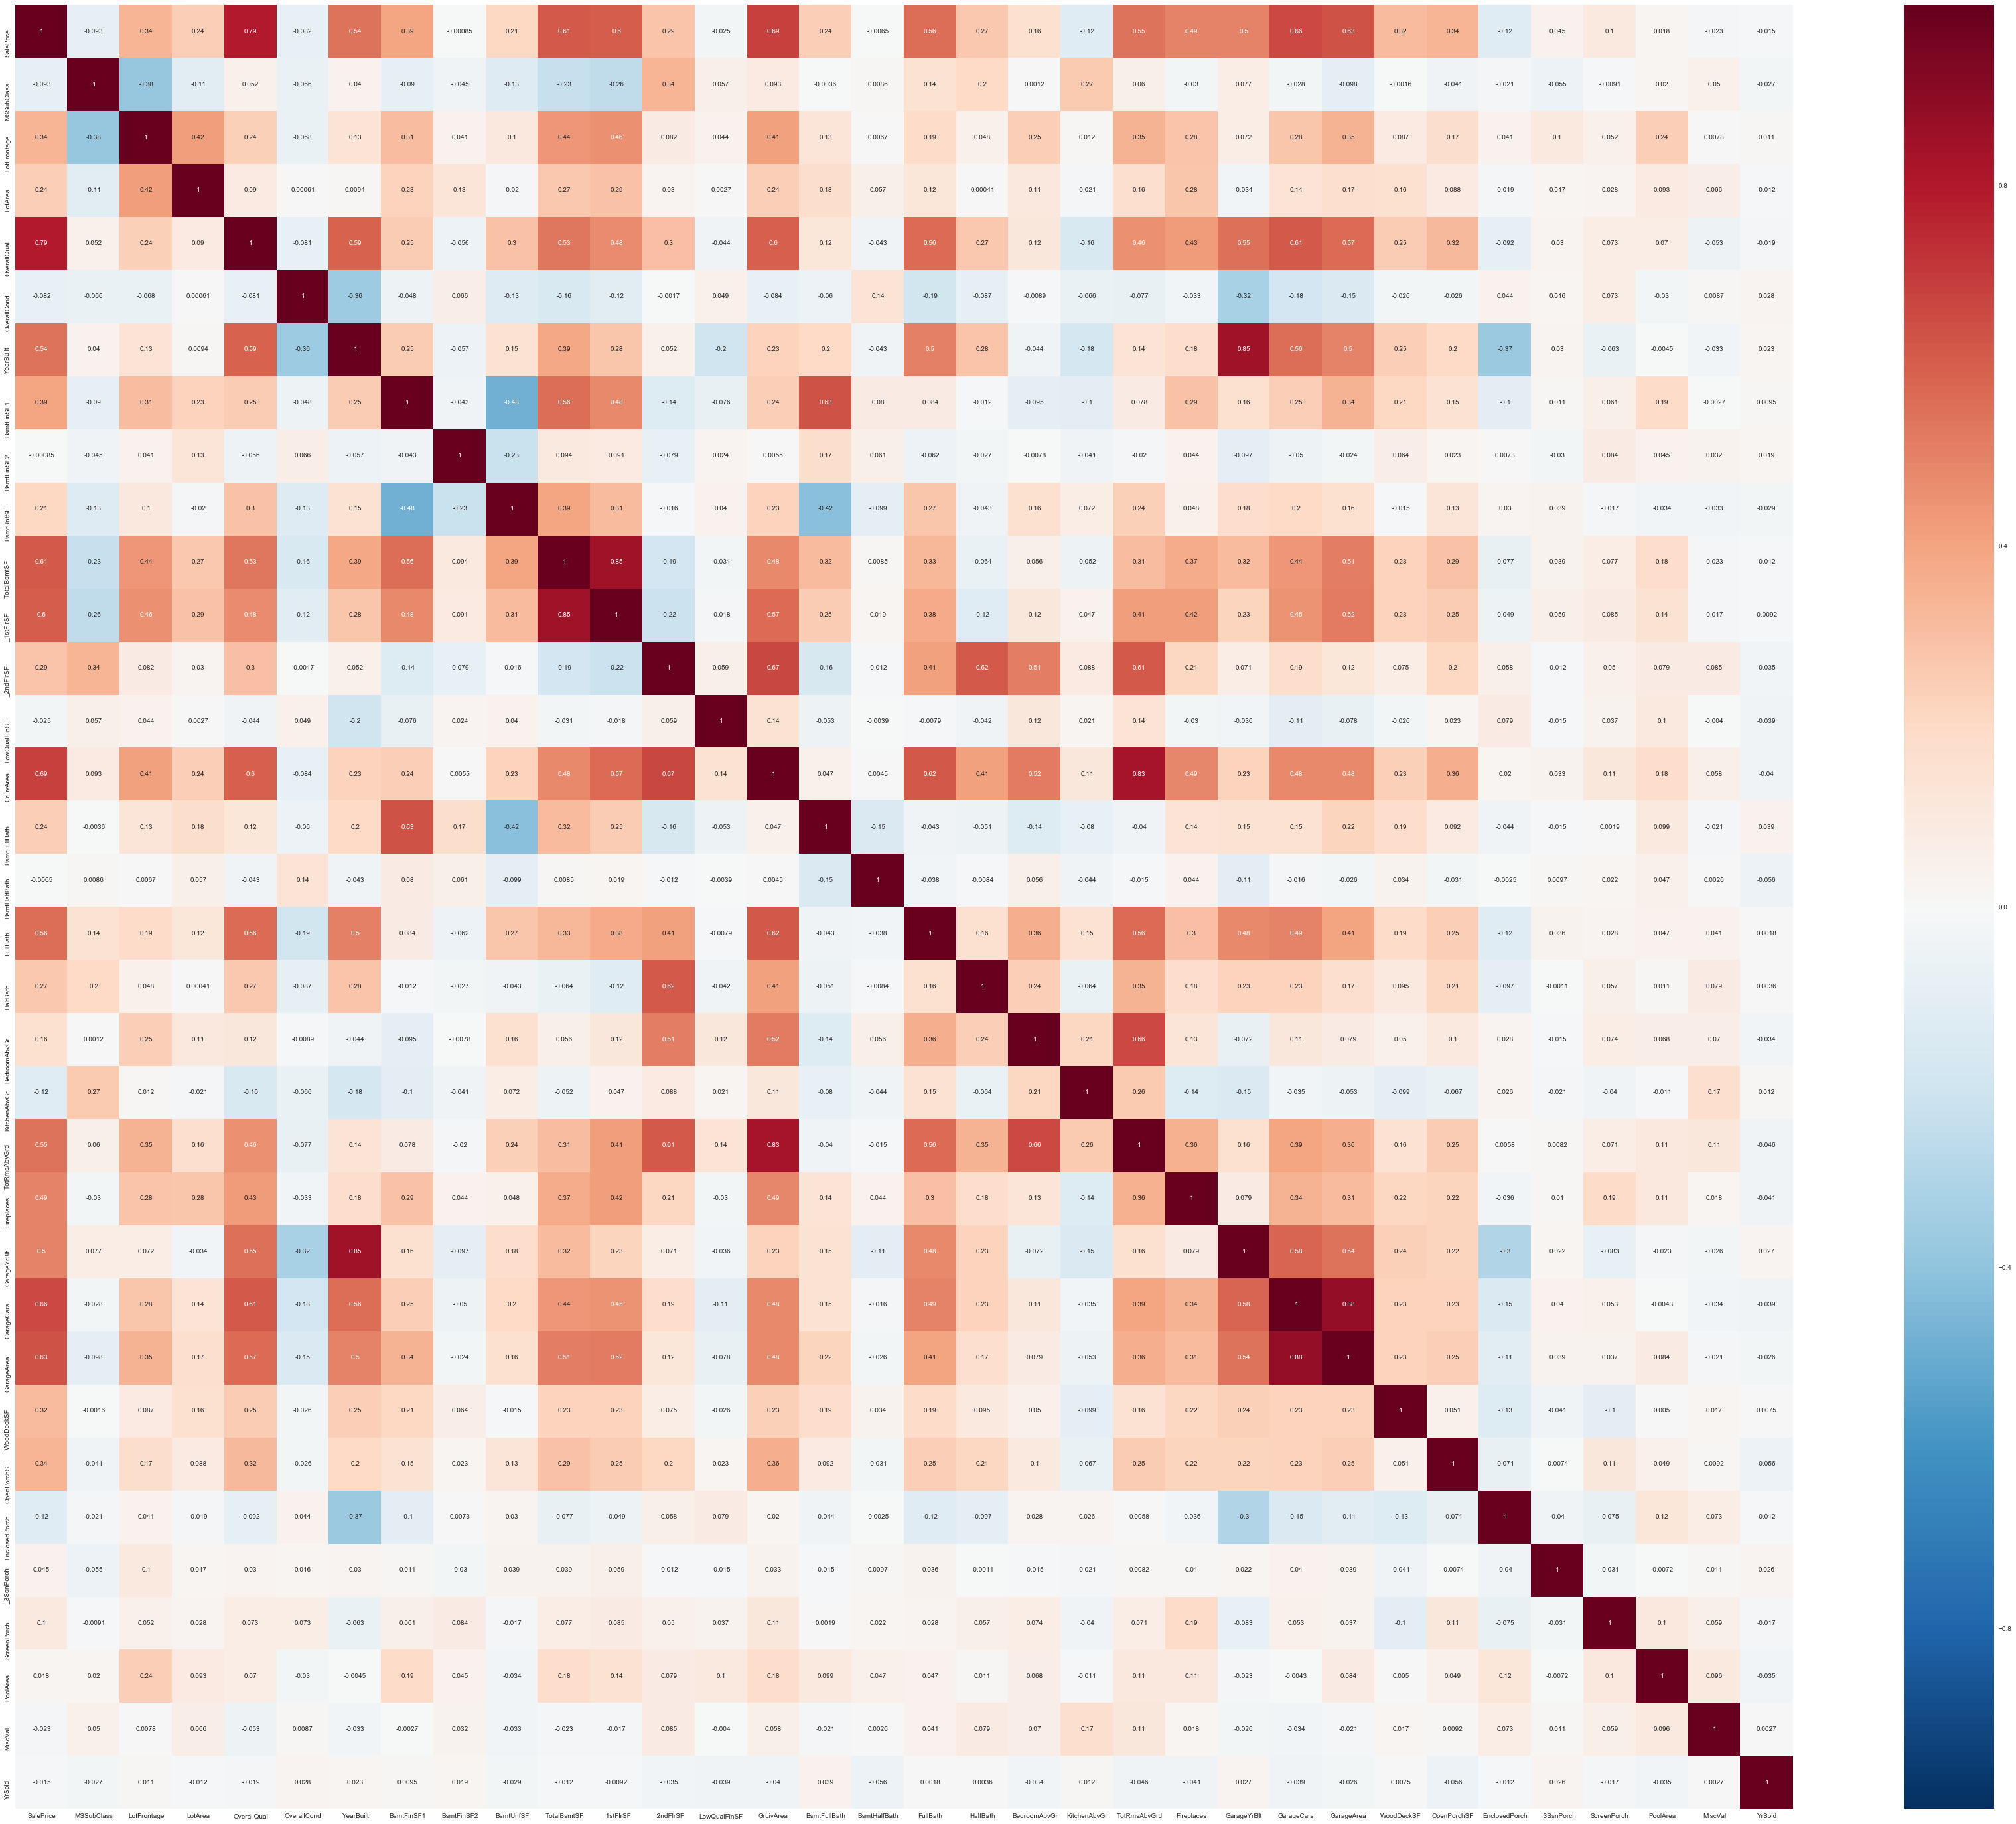

In [141]:
f, ax = plt.subplots(figsize=(60, 50))
sns.heatmap(corrmat, annot=True)

** 상관계수와 유의확률 확인**
* all coefficients between y and X are fine

In [174]:
# 피어슨 상관계수를 확인하는 함수 정의
def check_pearsonr(y, X):
    result = sp.stats.pearsonr(y, X)
    print("rho : {}  ,  p-value : {}".format(result[0], result[1]))

* 아래 변수들은 유의미한 상관계수들이다.

In [163]:
check_pearsonr(df.SalePrice, df.OverallQual) # Overall material and finish quality : 전체 자재 및 마감재 품질
check_pearsonr(df.SalePrice, df.YearBuilt) # Original construction date : 최초 건설 일자
check_pearsonr(df.SalePrice, df.TotalBsmtSF) # Total square feet of basement area : TotalBsmtSF
check_pearsonr(df.SalePrice, df._1stFlrSF) # First Floor square feet : 1층 평방 피트
check_pearsonr(df.SalePrice, df.GrLivArea) # Above grade (ground) living area square feet : 거주 면적 평방피트 (지면)
check_pearsonr(df.SalePrice, df.FullBath) # Full bathrooms above grade : 1등급 이상의 화장실
check_pearsonr(df.SalePrice, df.TotRmsAbvGrd) # Total rooms above grade (does not include bathrooms) : 욕실을 제외한 등급 이상의 방 수
check_pearsonr(df.SalePrice, df.Fireplaces) # Number of fireplaces : 벽난로 수
check_pearsonr(df.SalePrice, df.GarageCars) # Size of garage in car capacity : 차고의 차 용량 크기


rho : 0.7938825499520162  ,  p-value : 2.5173319386711827e-224
rho : 0.5446506782227131  ,  p-value : 1.2783864310948095e-80
rho : 0.613041946702871  ,  p-value : 2.49321256512554e-107
rho : 0.6023105387865265  ,  p-value : 1.0489057494146163e-102
rho : 0.6869518345491844  ,  p-value : 1.0798360639541936e-144
rho : 0.5580267256996368  ,  p-value : 2.3190179892602307e-85
rho : 0.546666120687004  ,  p-value : 2.5463207772928807e-81
rho : 0.4949971343868348  ,  p-value : 9.080834317328446e-65
rho : 0.657427371224979  ,  p-value : 1.6968433504187787e-128


* 그러나, 아래 변수들은 너무 낮은 상관계수를 나타내고 있다.

In [164]:
check_pearsonr(df.SalePrice, df.MSSubClass)
check_pearsonr(df.SalePrice, df.LotFrontage)
check_pearsonr(df.SalePrice, df.LotArea)
check_pearsonr(df.SalePrice, df.OverallCond)
check_pearsonr(df.SalePrice, df.BsmtFinSF1)
check_pearsonr(df.SalePrice, df.BsmtFinSF2)
check_pearsonr(df.SalePrice, df.BsmtUnfSF)
check_pearsonr(df.SalePrice, df._2ndFlrSF)
check_pearsonr(df.SalePrice, df.LowQualFinSF)
check_pearsonr(df.SalePrice, df.BsmtFullBath)
check_pearsonr(df.SalePrice, df.BsmtHalfBath)
check_pearsonr(df.SalePrice, df.HalfBath)
check_pearsonr(df.SalePrice, df.BedroomAbvGr)
check_pearsonr(df.SalePrice, df.KitchenAbvGr)
check_pearsonr(df.SalePrice, df.GarageYrBlt)
check_pearsonr(df.SalePrice, df.WoodDeckSF)
check_pearsonr(df.SalePrice, df.OpenPorchSF)
check_pearsonr(df.SalePrice, df.EnclosedPorch)
check_pearsonr(df.SalePrice, df._3SsnPorch)
check_pearsonr(df.SalePrice, df.ScreenPorch)
check_pearsonr(df.SalePrice, df.PoolArea)
check_pearsonr(df.SalePrice, df.MiscVal)
check_pearsonr(df.SalePrice, df.YrSold)


rho : -0.09285402556735908  ,  p-value : 0.002855790214589247
rho : nan  ,  p-value : 1.0
rho : 0.24454746242914174  ,  p-value : 1.7197533595980229e-15
rho : -0.08151041594443512  ,  p-value : 0.008866915717425653
rho : 0.39359590363806546  ,  p-value : 1.677244599885443e-39
rho : -0.0008537617045132538  ,  p-value : 0.9781669935121484
rho : 0.20616068459850873  ,  p-value : 2.3846123805323585e-11
rho : 0.2852188893923887  ,  p-value : 9.890257771452982e-21
rho : -0.024920894326842264  ,  p-value : 0.4243168273860851
rho : 0.24467318604323957  ,  p-value : 1.662057096607421e-15
rho : -0.006511657617248882  ,  p-value : 0.8346581828505153
rho : 0.26753540851020763  ,  p-value : 2.426449404310079e-18
rho : 0.16207911005473047  ,  p-value : 1.6950518072604607e-07
rho : -0.12166885796189039  ,  p-value : 9.055297194792129e-05
rho : nan  ,  p-value : 1.0
rho : 0.3151217429792594  ,  p-value : 3.52691317913231e-25
rho : 0.33856876553989956  ,  p-value : 4.8466503081373635e-29
rho : -0.11987

C:\Users\tjdal\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


In [185]:
# 유의미한 연속 변수들 구분
cols_real_use = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', '_1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'FullBath', 
                'Fireplaces', 'GarageCars']

dfX_real_use = dfX[cols_real_use]

print(len(dfX_real_use.columns))

9


In [186]:
df_real_use = pd.concat([dfy.SalePrice, dfX_real_use], axis=1)
df_real_use.head()

,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,_1stFlrSF,GrLivArea,TotRmsAbvGrd,FullBath,Fireplaces,GarageCars
0,208500,7,2003,856,856,1710,8,2,0,2
1,181500,6,1976,1262,1262,1262,6,2,1,2
2,223500,7,2001,920,920,1786,6,2,1,2
3,140000,7,1915,756,961,1717,7,1,1,3
4,250000,8,2000,1145,1145,2198,9,2,1,3


In [187]:
corrmat_use = df_real_use.corr()
corrmat_use

,SalePrice,OverallQual,YearBuilt,TotalBsmtSF,_1stFlrSF,GrLivArea,TotRmsAbvGrd,FullBath,Fireplaces,GarageCars
SalePrice,1.000000,0.793883,0.544651,0.613042,0.602311,0.686952,0.546666,0.558027,0.494997,0.657427
OverallQual,0.793883,1.000000,0.593588,0.534910,0.475250,0.600534,0.460057,0.563615,0.427491,0.614012
YearBuilt,0.544651,0.593588,1.000000,0.388353,0.279158,0.231649,0.138475,0.504817,0.179724,0.558765
TotalBsmtSF,0.613042,0.534910,0.388353,1.000000,0.846187,0.479782,0.311927,0.334304,0.367210,0.437780
_1stFlrSF,0.602311,0.475250,0.279158,0.846187,1.000000,0.570001,0.414619,0.375540,0.416727,0.450868
GrLivArea,0.686952,0.600534,0.231649,0.479782,0.570001,1.000000,0.832426,0.623290,0.485583,0.481653
TotRmsAbvGrd,0.546666,0.460057,0.138475,0.311927,0.414619,0.832426,1.000000,0.563814,0.358740,0.392982
FullBath,0.558027,0.563615,0.504817,0.334304,0.375540,0.623290,0.563814,1.000000,0.302029,0.493256
Fireplaces,0.494997,0.427491,0.179724,0.367210,0.416727,0.485583,0.358740,0.302029,1.000000,0.344989
GarageCars,0.657427,0.614012,0.558765,0.437780,0.450868,0.481653,0.392982,0.493256,0.344989,1.000000


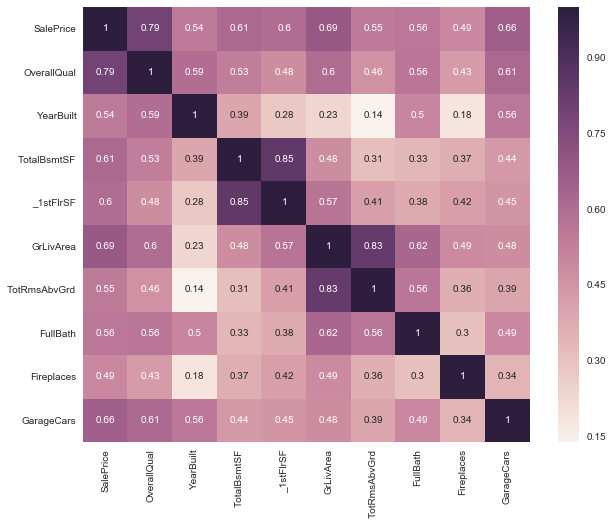

In [188]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat_use, annot=True)

In [189]:
# 선택사항 : matplotlib.pyplot 스타일 리스트
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [190]:
for i in range(0, len(cols_real_use), 3):
    print("dfX{}".format(cols_real_use[i: i+3]))

dfX['OverallQual', 'YearBuilt', 'TotalBsmtSF']
dfX['_1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd']
dfX['FullBath', 'Fireplaces', 'GarageCars']


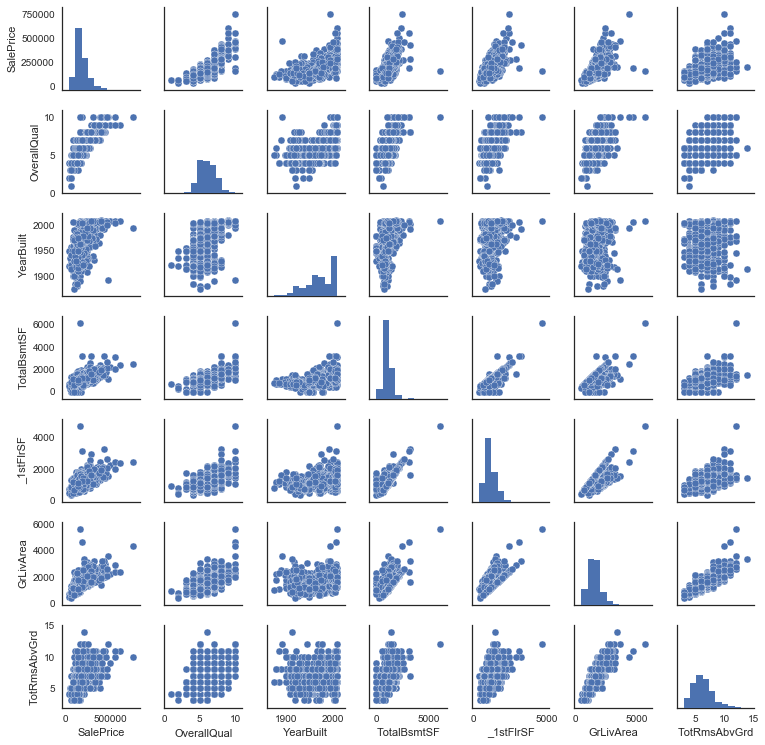

In [197]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.SalePrice, dfX[cols_real_use[:6]]], axis=1) ,size=1.5)

    
# Overall material and finish quality : 전체 자재 및 마감재 품질
# Original construction date : 최초 건설 일자
# Total square feet of basement area : TotalBsmtSF
# First Floor square feet : 1층 평방 피트
# Above grade (ground) living area square feet : 거주 면적 평방피트 (지면)
# Total rooms above grade (does not include bathrooms) : 욕실을 제외한 등급 이상의 방 수


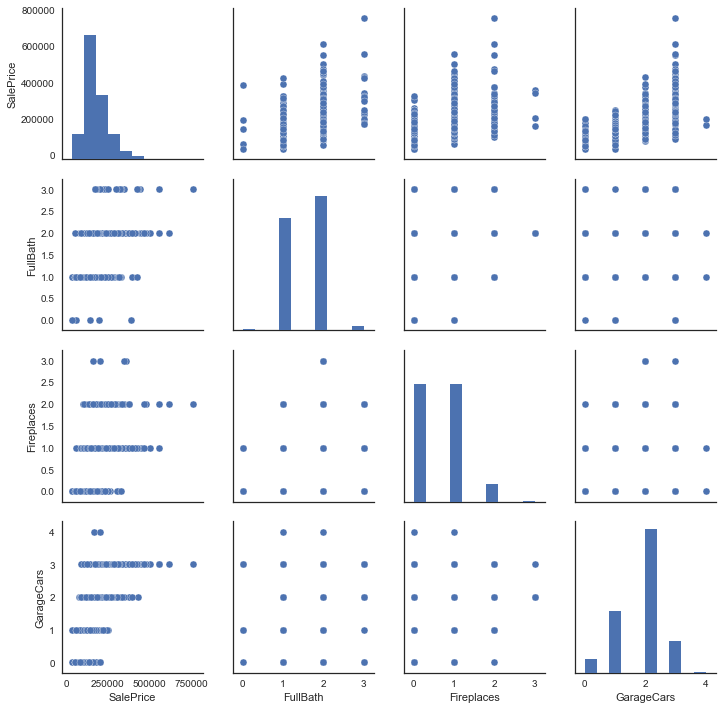

In [205]:
with plt.style.context(('seaborn-white')):
    sns_plot = sns.pairplot(pd.concat([dfy.SalePrice, dfX[cols_real_use[6:]]], axis=1) ,size=2.5)

    
# Full bathrooms above grade : 1등급 이상의 화장실
# Number of fireplaces : 벽난로 수
# Size of garage in car capacity : 차고의 차 용량 크기

## 독립표본 t - 검정
* only for categorical variables

In [169]:
df_cat = pd.concat([dfy.SalePrice, dfX_cat], axis=1)
df_cat.head()

,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,208500,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NaN,NaN,NaN,2,WD,Normal
1,181500,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,NaN,NaN,NaN,5,WD,Normal
2,223500,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,NaN,NaN,NaN,9,WD,Normal
3,140000,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,NaN,NaN,NaN,2,WD,Abnorml
4,250000,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,NaN,NaN,NaN,12,WD,Normal


### 카테고리 변수 중 단일 값만 소유한 변수 확인
* Utilities 변수 확인

In [170]:
for col in dfX_cat.columns:
    print("%-17s : %s" % (col, df[col].unique()))

MSZoning          : ['RL' 'RM' 'FV' 'C (all)' 'RH']
Street            : ['Pave' 'Grvl']
Alley             : [nan 'Grvl' 'Pave']
LotShape          : ['Reg' 'IR1' 'IR2' 'IR3']
LandContour       : ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities         : ['AllPub']
LotConfig         : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope         : ['Gtl' 'Mod' 'Sev']
Neighborhood      : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'Sawyer' 'NridgHt' 'NAmes' 'BrkSide' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1        : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRAn' 'RRNe' 'PosA' 'RRNn']
Condition2        : ['Norm' 'RRNn' 'Feedr' 'PosN' 'RRAn' 'RRAe']
BldgType          : ['1Fam' 'TwnhsE' 'Duplex' '2fmCon' 'Twnhs']
HouseStyle        : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SLvl' '2.5Unf' '2.5Fin' 'SFoyer']
YearRemodAdd      : [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2

In [172]:
# Utilities 변수 제거
df_cat = df_cat.drop('Utilities', axis=1)

In [173]:
tmp_list = df['MasVnrType'].unique()
tmp_list

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)